In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 48 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [4]:

history = classifier.fit(training_set,
                         steps_per_epoch = 2,
                         epochs = 48,
                         validation_data = test_set,
                         validation_steps = 5)

C:\Users\Varoun\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Varoun\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/48
2/2 [==============================] - 16s 14s/step - loss: 0.6977 - accuracy: 0.4583 - val_loss: 0.6892 - val_accuracy: 0.5211
Epoch 2/48
2/2 [==============================] - 5s 2s/step - loss: 0.6937 - accuracy: 0.4722
Epoch 3/48
2/2 [==============================] - 5s 3s/step - loss: 0.6943 - accuracy: 0.4861
Epoch 4/48
2/2 [==============================] - 5s 2s/step - loss: 0.6892 - accuracy: 0.6458
Epoch 5/48
2/2 [==============================] - 5s 3s/step - loss: 0.6873 - accuracy: 0.5833
Epoch 6/48
2/2 [==============================] - 5s 3s/step - loss: 0.6879 - accuracy: 0.5069
Epoch 7/48
2/2 [==============================] - 5s 2s/step - loss: 0.6830 - accuracy: 0.5660
Epoch 8/48
2/2 [==============================] - 5s 2s/step - loss: 0.6776 - accuracy: 0.7500
Epoch 9/48
2/2 [==============================] - 5s 4s/step - loss: 0.6777 - accuracy: 0.7639
Epoch 10/48
2/2 [==============================] - 5s 2s/step - loss: 0.6677 - accuracy: 0.7118
Epoch

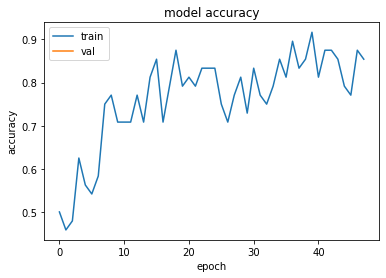

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

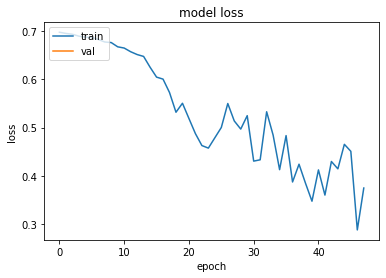

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
# Evaluate the model on the test data using evaluate
print("Evaluate on test data")
results = classifier.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
3/3 [==============================] - 6s 2s/step - loss: 0.1585 - accuracy: 0.9859
test loss, test acc: [0.15853796899318695, 0.98591548204422]
